In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
%matplotlib inline

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def displacement(FPn,FPtype):
    x=24.324744
    y=12.399260
    z=11.812478
    dfFP=pd.DataFrame()
    dfDFT=pd.DataFrame()
    dfFP=pd.read_csv('data.FP{}'.format(FPn),skiprows=11,sep=' ',nrows=320,header=None)
    dfDFT=pd.read_csv('data.DFT{}'.format(FPn),skiprows=11,sep=' ',nrows=320,header=None)
    dis=dfDFT-dfFP
    dis = dis.drop(columns=[0,1])
    dis = dis.rename(columns={2:'x',3:'y',4:'z'})
    for i in range(320):
        if abs(dis.x[i])+3>x:
            if dis.x[i]>0:
                dis.x[i]=dis.x[i]-x
            else:
                dis.x[i]=dis.x[i]+x
        if abs(dis.y[i])+3>y:
            if dis.y[i]>0:
                dis.y[i]=dis.y[i]-y
            else:
                dis.y[i]=dis.y[i]+y
        if abs(dis.z[i])+3>z:
            if dis.z[i]>0:
                dis.z[i]=dis.z[i]-z
            else :
                dis.z[i]=dis.z[i]+z
    dis['dis']=np.sqrt(dis.x**2+dis.y**2+dis.z**2)
    #print(dis['dis'].describe())
    plt.hist(dis.dis,50, density=True,label='{}'.format(FPn)+' ' +FPtype)
    plt.xlabel('Displacement distance, ($\AA$)')
    #plt.ylabel('Atoms number')
    return dis


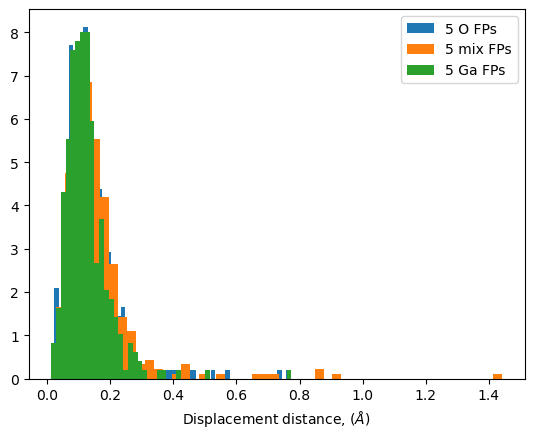

In [3]:
path='/Users/ruhe/Desktop/ga2o3/FP/DFT/O'
os.chdir(path)
for FPn in [5]:
    dis=displacement(FPn,'O FPs')
path='/Users/ruhe/Desktop/ga2o3/FP/DFT/mix'
os.chdir(path)
for FPn in [5]:
    dis=displacement(FPn,'mix FPs')
path='/Users/ruhe/Desktop/ga2o3/FP/DFT/Ga'
os.chdir(path)
for FPn in [5]:
    dis=displacement(FPn,'Ga FPs')
plt.legend()

120             x         y         z  5  6  7       dis
102  1.069897 -1.281935 -0.108838  0  0  0  1.673285


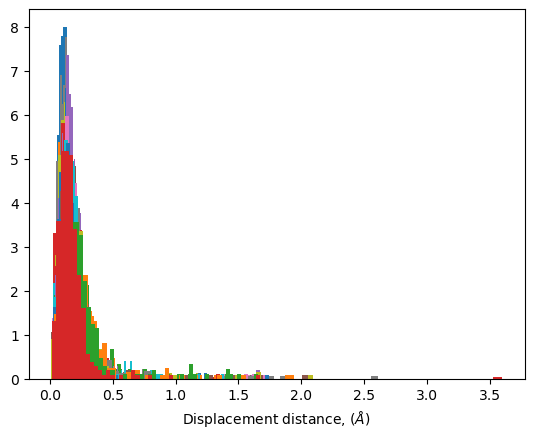

In [26]:
path='/Users/ruhe/Desktop/ga2o3/FP/DFT/Ga'
os.chdir(path)
for FPn in range(5, 121, 5):
    dis=displacement(FPn,'Ga FPs')
print(FPn,dis[dis.dis>1])
#plt.legend()

            x         y        z  5  6  7       dis
119 -0.632525  0.793183 -0.03142  0  0  0  1.014995


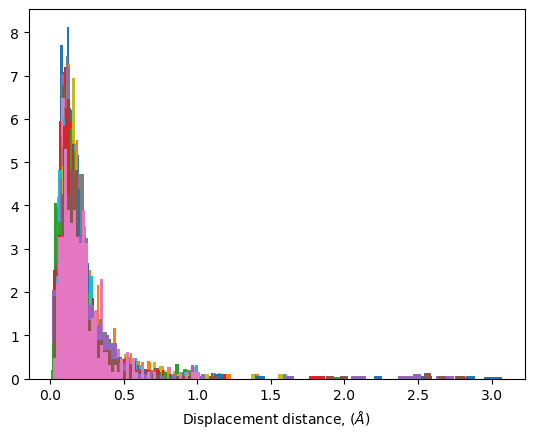

In [27]:
path='/Users/ruhe/Desktop/ga2o3/FP/DFT/O'
os.chdir(path)
for FPn in range(5, 136, 5):
    dis=displacement(FPn,'O FPs')
#plt.legend()
#dis=displacement(15,'O FPs')
print(dis[dis.dis>1])

            x         y         z       dis
72  -0.244346  0.122063  1.172395  1.203791
80  -0.740503  1.679483 -0.048039  1.836114
88   1.238019  0.184484 -1.331579  1.827520
114 -0.868910 -1.197469 -0.193818  1.492147


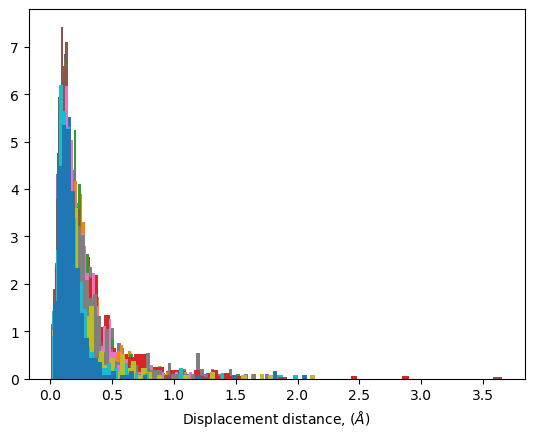

In [28]:
path='/Users/ruhe/Desktop/ga2o3/FP/DFT/mix'
os.chdir(path)
for FPn in range(5, 106, 5):
    dis=displacement(FPn,'mix FPs')
#plt.legend()
print(dis[dis.dis>1])